## Question 3a
For each year: Can we identify trends or patterns in specific neighbourhoods (e.g. certain neighbourhoods seeing an increase or decrease in crime)?

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Read in CSV as a DataFrame and inspect
mci_all = pd.read_csv('resources/mci_no_duplicates_2018_20_22.csv')
mci_all.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,134022,GO-20181532,2018-01-01,2018-01-01,2018,January,1,1,Monday,4.0,...,Other Commercial / Corporate Places (For Profi...,Commercial,1430,100,Assault,Assault,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
1,134023,GO-20184352,2018-01-01,2018-01-01,2018,January,1,1,Monday,18.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,150,Fenside-Parkwoods,45,Parkwoods-Donalda (45)
2,134024,GO-20184878,2018-01-01,2018-01-01,2018,January,1,1,Monday,21.0,...,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,106,Humewood-Cedarvale,106,Humewood-Cedarvale (106)
3,134025,GO-20183609,2018-01-01,2018-01-01,2018,January,1,1,Monday,15.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,95,Annex,95,Annex (95)
4,134026,GO-20184674,2018-01-01,2018-01-01,2018,January,1,1,Monday,20.0,...,Convenience Stores,Commercial,1610,210,Robbery - Business,Robbery,123,Cliffcrest,123,Cliffcrest (123)


In [4]:
#Drop unncessary rows
mci_columns = mci_all[['EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'OCC_MONTH', 'OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_columns.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20181532,2018-01-01,2018-01-01,January,2018.0,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
1,GO-20184352,2018-01-01,2018-01-01,January,2018.0,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,150,Fenside-Parkwoods
2,GO-20184878,2018-01-01,2018-01-01,January,2018.0,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,106,Humewood-Cedarvale
3,GO-20183609,2018-01-01,2018-01-01,January,2018.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,95,Annex
4,GO-20184674,2018-01-01,2018-01-01,January,2018.0,Convenience Stores,Commercial,Robbery - Business,Robbery,123,Cliffcrest


In [5]:
#Check dataframe dtypes
mci_columns.dtypes

EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
OCC_MONTH             object
OCC_YEAR             float64
LOCATION_TYPE         object
PREMISES_TYPE         object
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
dtype: object

In [6]:
#Convert OCC_YEAR column from dtype float64 to int64 then check dtypes again
mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')
mci_columns.dtypes

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_49649/3081604221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')


EVENT_UNIQUE_ID      object
REPORT_DATE          object
OCC_DATE             object
OCC_MONTH            object
OCC_YEAR              int64
LOCATION_TYPE        object
PREMISES_TYPE        object
OFFENCE              object
MCI_CATEGORY         object
HOOD_158             object
NEIGHBOURHOOD_158    object
dtype: object

In [7]:
#Check for any null values
mci_columns.count()

EVENT_UNIQUE_ID      104454
REPORT_DATE          104454
OCC_DATE             104454
OCC_MONTH            104454
OCC_YEAR             104454
LOCATION_TYPE        104454
PREMISES_TYPE        104454
OFFENCE              104454
MCI_CATEGORY         104454
HOOD_158             104454
NEIGHBOURHOOD_158    104454
dtype: int64

In [8]:
#Separate dataframe into individual dataframes for each year (2018, 2020 and 2022)
mci_2018 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2018]
mci_2020 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2020]
mci_2022 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2022]

## 2018

In [9]:
#Inspect dataframe for 2018
mci_2018.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20181532,2018-01-01,2018-01-01,January,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
1,GO-20184352,2018-01-01,2018-01-01,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,150,Fenside-Parkwoods
2,GO-20184878,2018-01-01,2018-01-01,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,106,Humewood-Cedarvale
3,GO-20183609,2018-01-01,2018-01-01,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,95,Annex
4,GO-20184674,2018-01-01,2018-01-01,January,2018,Convenience Stores,Commercial,Robbery - Business,Robbery,123,Cliffcrest


In [10]:
#Check the sum of offences reported in each neighbourhood
hood_offence_total = mci_2018.groupby('NEIGHBOURHOOD_158')['EVENT_UNIQUE_ID'].count()
hood_offence_total 

NEIGHBOURHOOD_158
Agincourt North                 226
Agincourt South-Malvern West    271
Alderwood                        81
Annex                           520
Avondale                        105
                               ... 
Yonge-Doris                     129
Yonge-Eglinton                  115
Yonge-St.Clair                   64
York University Heights         640
Yorkdale-Glen Park              324
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [11]:
#Sort by highest to lowest
hood_sorted = hood_offence_total.sort_values(ascending = False)
hood_sorted

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
                          ... 
Guildwood                   64
Yonge-St.Clair              64
Woodbine-Lumsden            63
Lambton Baby Point          54
Maple Leaf                  53
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [12]:
#Get top 5 and bottom 5 neighbourhoods by sum of offences
top_5_hoods = hood_sorted.head()
bottom_5_hoods = hood_sorted.tail()
top_5_hoods

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
Name: EVENT_UNIQUE_ID, dtype: int64

In [13]:
#From the bottom 5 neighbourhood series, extract a list of each neighbourhood name using a for loop
bottom_5_names = bottom_5_hoods.index
bottom_neighbourhoods = []
for index in range(0, len(bottom_5_names)):
   bottom_neighbourhoods.append(bottom_5_names[index])
bottom_neighbourhoods

['Guildwood',
 'Yonge-St.Clair',
 'Woodbine-Lumsden',
 'Lambton Baby Point',
 'Maple Leaf']

## Neighbourhoods with the highest number of offences
We separated each of the top 5 neighbourhoods into their own dataframes to further analyze crime indicators on a neighbourhood level.

In [14]:
#Separate mci_2018 dataframe into 5 dataframes for each of the top 5 neighbourhoods
whc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
mp_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Moss Park']
dye_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Downtown Yonge East']
kc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Kensington-Chinatown']
ybc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'Yonge-Bay Corridor']

### Neighbourhood 1: West Humber-Clairville

In [15]:
#Inspect WHC dataframe
whc_hood

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
66,GO-20182608,2018-01-01,2018-01-01,January,2018,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Over,Theft Over,1,West Humber-Clairville
98,GO-20189906,2018-01-02,2018-01-02,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Mugging,Robbery,1,West Humber-Clairville
182,GO-201817980,2018-01-03,2018-01-03,January,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,1,West Humber-Clairville
221,GO-201813380,2018-01-03,2018-01-02,January,2018,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,1,West Humber-Clairville
249,GO-201821144,2018-01-04,2018-01-04,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,1,West Humber-Clairville
...,...,...,...,...,...,...,...,...,...,...,...
34612,GO-20201985462,2020-10-14,2018-10-04,October,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,1,West Humber-Clairville
34666,GO-2021597598,2021-04-01,2018-01-01,January,2018,"Construction Site (Warehouse, Trailer, Shed)",Commercial,Theft Over,Theft Over,1,West Humber-Clairville
34705,GO-20211976842,2021-10-14,2018-01-01,January,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault With Weapon,Assault,1,West Humber-Clairville
34706,GO-20211976842,2021-10-14,2018-01-01,January,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,1,West Humber-Clairville


In [16]:
#Group the whc_hood dataframe by MCI_CATEGORY and get the count of offences per each category
whc_mci_category = whc_hood.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
whc_mci_category

MCI_CATEGORY
Assault            300
Auto Theft         436
Break and Enter    170
Robbery             81
Theft Over          54
Name: EVENT_UNIQUE_ID, dtype: int64

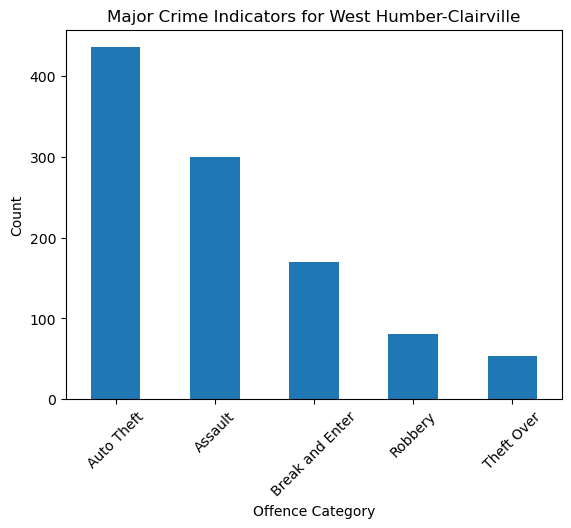

In [17]:
#Create a bar chart of MCI_CATEGORY for West Humber-Clairville
whc_mci_category.sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Offence Category')
plt.title('Major Crime Indicators for West Humber-Clairville')
plt.show()

In [44]:
#Group whc_hood by location type and get the count of each location
whc_location = whc_hood.groupby('LOCATION_TYPE').count()
whc_location

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",70,70,70,70,70,70,70,70,70,70
"Bank And Other Financial Institutions (Money Mart, Tsx)",5,5,5,5,5,5,5,5,5,5
Bar / Restaurant,45,45,45,45,45,45,45,45,45,45
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",28,28,28,28,28,28,28,28,28,28
Community Group Home,1,1,1,1,1,1,1,1,1,1
"Construction Site (Warehouse, Trailer, Shed)",9,9,9,9,9,9,9,9,9,9
Convenience Stores,9,9,9,9,9,9,9,9,9,9
"Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",14,14,14,14,14,14,14,14,14,14
"Gas Station (Self, Full, Attached Convenience)",12,12,12,12,12,12,12,12,12,12


In [63]:
#Check how many location types have only 1 offence
whc_location_one_occ = whc_location.loc[whc_location['EVENT_UNIQUE_ID'] == 1]
len(whc_location_one_occ)

7

In [65]:
#Check how many location types have less than 10 offences
whc_location_ten_occ = whc_location.loc[whc_location['EVENT_UNIQUE_ID'] <= 10]
len(whc_location_ten_occ)

20

In [75]:
#Drop the location types that have less than 10 offences for the whole year
whc_location_occ = whc_location.loc[whc_location['EVENT_UNIQUE_ID'] >= 10]
whc_location_occ

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",70,70,70,70,70,70,70,70,70,70
Bar / Restaurant,45,45,45,45,45,45,45,45,45,45
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",28,28,28,28,28,28,28,28,28,28
"Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",14,14,14,14,14,14,14,14,14,14
"Gas Station (Self, Full, Attached Convenience)",12,12,12,12,12,12,12,12,12,12
"Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)",14,14,14,14,14,14,14,14,14,14
"Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg",204,204,204,204,204,204,204,204,204,204
"Parking Lots (Apt., Commercial Or Non-Commercial)",263,263,263,263,263,263,263,263,263,263
Schools During Supervised Activity,15,15,15,15,15,15,15,15,15,15


In [79]:
#List of index labels
whc_location_occ.index

Index(['Apartment (Rooming House, Condo)', 'Bar / Restaurant',
       'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)',
       'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)',
       'Gas Station (Self, Full, Attached Convenience)',
       'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)',
       'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg',
       'Parking Lots (Apt., Commercial Or Non-Commercial)',
       'Schools During Supervised Activity',
       'Single Home, House (Attach Garage, Cottage, Mobile)',
       'Streets, Roads, Highways (Bicycle Path, Private Road)'],
      dtype='object', name='LOCATION_TYPE')

In [82]:
#Rename index labels to be shorter/more readable
whc_location_final = whc_location_occ.rename(index = {'Apartment (Rooming House, Condo)': 'Apartment', 
                                   'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit', 
                                   'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership', 'Gas Station (Self, Full, Attached Convenience)': 'Gas Station',
                                   'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities', 
                                   'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Commercial Other',
                                   'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots', 
                                   'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House', 
                                   'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways'})
whc_location_final

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
Apartment,70,70,70,70,70,70,70,70,70,70
Bar / Restaurant,45,45,45,45,45,45,45,45,45,45
Commercial Dwelling Unit,28,28,28,28,28,28,28,28,28,28
Dealership,14,14,14,14,14,14,14,14,14,14
Gas Station,12,12,12,12,12,12,12,12,12,12
Medical Facilities,14,14,14,14,14,14,14,14,14,14
Commercial Other,204,204,204,204,204,204,204,204,204,204
Parking Lots,263,263,263,263,263,263,263,263,263,263
Schools During Supervised Activity,15,15,15,15,15,15,15,15,15,15


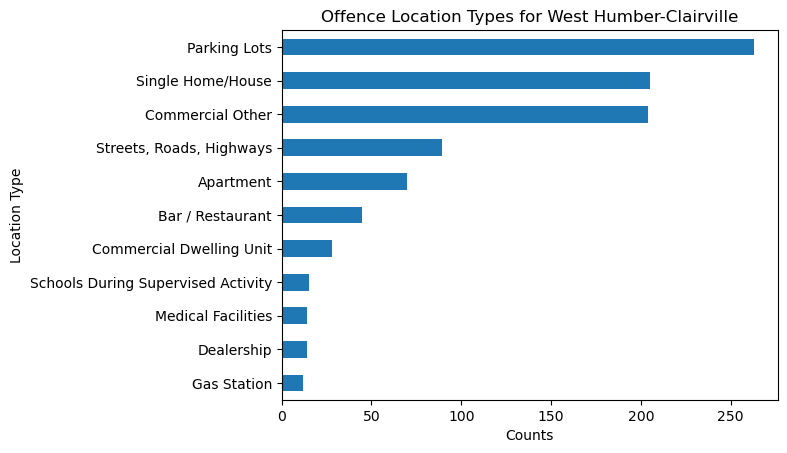

In [149]:
#Create a bar chart for the location types in WHC
whc_location_final['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
plt.title('Offence Location Types for West Humber-Clairville')
plt.ylabel('Location Type')
plt.xlabel('Counts')
plt.show()

In [90]:
#Group whc_hood by premises type and get the count of each premise
whc_premises = whc_hood.groupby('PREMISES_TYPE').count()
whc_premises

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
PREMISES_TYPE,,,,,,,,,,
Apartment,70,70,70,70,70,70,70,70,70,70
Commercial,326,326,326,326,326,326,326,326,326,326
Educational,26,26,26,26,26,26,26,26,26,26
House,205,205,205,205,205,205,205,205,205,205
Other,40,40,40,40,40,40,40,40,40,40
Outside,364,364,364,364,364,364,364,364,364,364
Transit,10,10,10,10,10,10,10,10,10,10


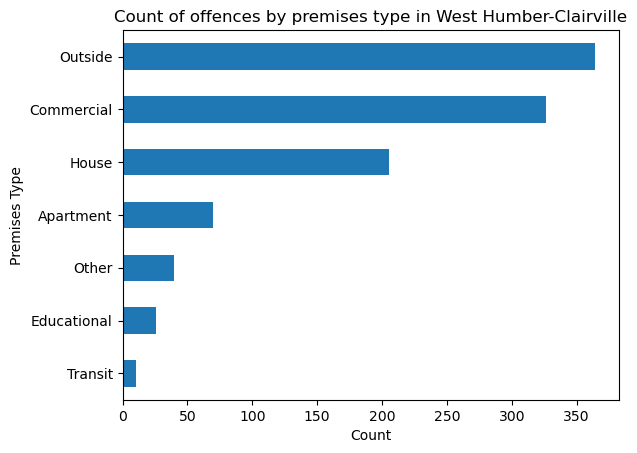

In [96]:
#Create bar chart for premises type in WHC
whc_premises['EVENT_UNIQUE_ID'].sort_values(ascending = True).plot(kind = 'barh')
plt.title('Count of offences by premises type in West Humber-Clairville')
plt.ylabel('Premises Type')
plt.xlabel('Count')
plt.show()

In [102]:
#Copy the whc_hood dataframe to order months in chronological order (making a copy so the original df is intact)
whc_occ_month = whc_hood.copy()

In [105]:
#Order months in the series in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
whc_occ_month['OCC_MONTH'] = pd.Categorical(whc_occ_month['OCC_MONTH'], categories = months, ordered = True)

In [106]:
#Sort this new dataframe by month
whc_occ_month = whc_occ_month.sort_values(by = 'OCC_MONTH')

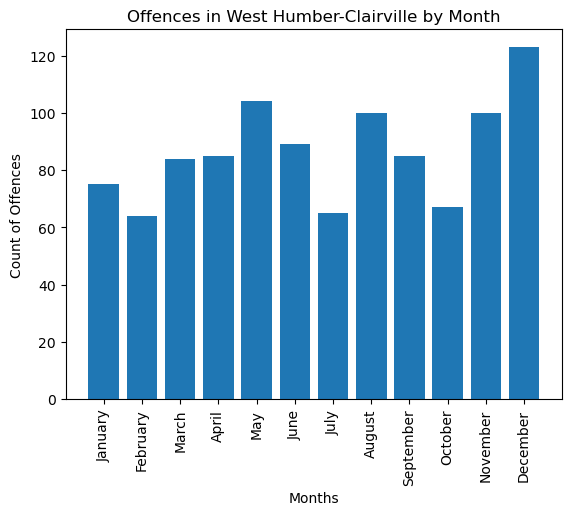

In [120]:
#Create bar chart of offences in WHC by month
#Set x and y values
whc_occ_x = months
whc_occ_y = whc_occ_month.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
#Set x tick labels and locations
xticks_labels = months
xtick_locations = [value for value in whc_occ_x]
#Generate the plot and set the x ticks, title and axis labels
plt.bar(whc_occ_x, whc_occ_y)
plt.xticks(xtick_locations, xticks_labels, rotation = 90)
plt.title('Offences in West Humber-Clairville by Month')
plt.ylabel('Count of Offences')
plt.xlabel('Months')
plt.show()

### What is the most common location type for auto theft offences?

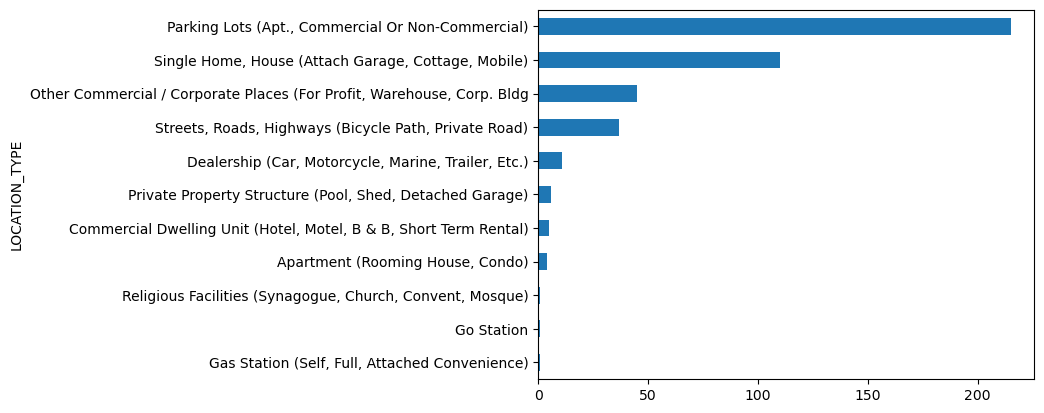

In [127]:
#Separate whc_hood dataframe to only keep rows where the MCI category is auto theft
whc_auto_theft = whc_hood.loc[whc_hood['MCI_CATEGORY'] == 'Auto Theft']
#Group this new dataframe by location type and plot a horizontal bar chart
whc_auto_theft_loc = whc_auto_theft.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
whc_auto_theft_loc.sort_values().plot(kind = 'barh')
plt.show()

### What is the most common location type for assault offences?

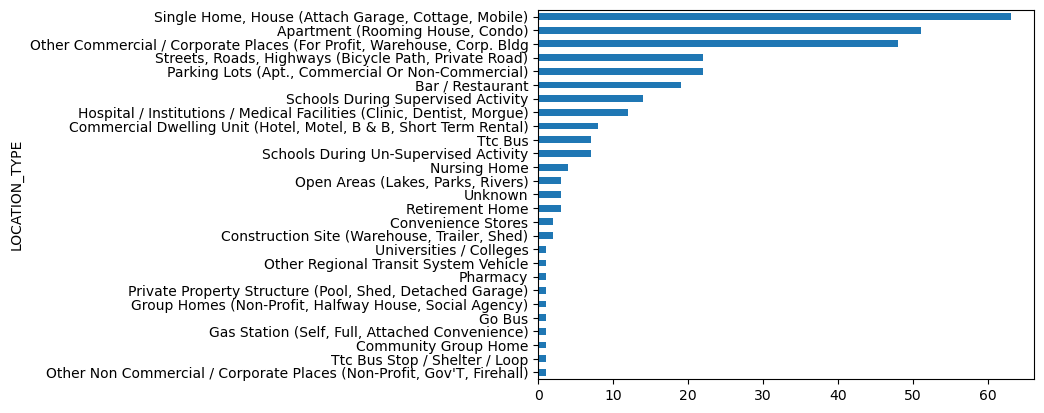

In [128]:
#Separate whc_hood dataframe to only keep rows where the MCI category is assault
whc_assault = whc_hood.loc[whc_hood['MCI_CATEGORY'] == 'Assault']
#Group this new dataframe by location type and plot a horizontal bar chart
whc_assault_loc = whc_assault.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
whc_assault_loc.sort_values().plot(kind = 'barh')
plt.show()

### Neighbourhood 2: Moss Park

In [129]:
#Inspect MP dataframe
mp_hood

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
59,GO-20182061,2018-01-01,2018-01-01,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Mugging,Robbery,73,Moss Park
110,GO-20187033,2018-01-02,2018-01-01,January,2018,Bar / Restaurant,Commercial,B&E,Break and Enter,73,Moss Park
125,GO-201810218,2018-01-02,2018-01-02,January,2018,Homeless Shelter / Mission,Other,Assault Peace Officer,Assault,73,Moss Park
145,GO-20186095,2018-01-02,2018-01-02,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Mugging,Robbery,73,Moss Park
176,GO-201816901,2018-01-03,2018-01-03,January,2018,"Private Property Structure (Pool, Shed, Detach...",Other,Assault Bodily Harm,Assault,73,Moss Park
...,...,...,...,...,...,...,...,...,...,...,...
34362,GO-20191105130,2019-06-15,2018-07-10,July,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park
34363,GO-20191105130,2019-06-15,2018-07-10,July,2018,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,73,Moss Park
34668,GO-2021634868,2021-04-07,2018-12-29,December,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park
34700,GO-20211627033,2021-08-26,2018-10-01,October,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park


In [130]:
#Group the mp_hood dataframe by MCI_CATEGORY and get the count of offences per each category
mp_hood_category = mp_hood.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
mp_hood_category

MCI_CATEGORY
Assault            545
Auto Theft          45
Break and Enter    135
Robbery            151
Theft Over          36
Name: EVENT_UNIQUE_ID, dtype: int64

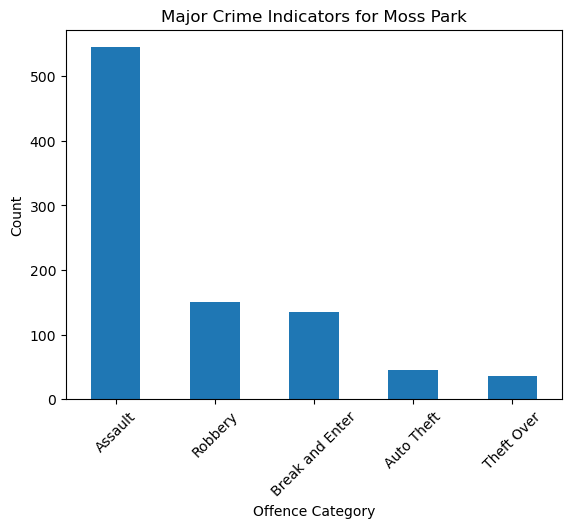

In [131]:
#Create a bar chart of MCI_CATEGORY for Moss Park
mp_hood_category.sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Offence Category')
plt.title('Major Crime Indicators for Moss Park')
plt.show()

In [135]:
#Group mp_hood by location type and get the count of each location
mp_location = mp_hood.groupby('LOCATION_TYPE').count()
mp_location

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",268,268,268,268,268,268,268,268,268,268
"Bank And Other Financial Institutions (Money Mart, Tsx)",1,1,1,1,1,1,1,1,1,1
Bar / Restaurant,21,21,21,21,21,21,21,21,21,21
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",9,9,9,9,9,9,9,9,9,9
Community Group Home,5,5,5,5,5,5,5,5,5,5
"Construction Site (Warehouse, Trailer, Shed)",1,1,1,1,1,1,1,1,1,1
Convenience Stores,13,13,13,13,13,13,13,13,13,13
"Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",6,6,6,6,6,6,6,6,6,6
"Gas Station (Self, Full, Attached Convenience)",3,3,3,3,3,3,3,3,3,3


In [133]:
#Check how many location types have less than 10 offences
mp_location_ten_occ = mp_location.loc[mp_location['EVENT_UNIQUE_ID'] <= 10]
len(mp_location_ten_occ)

20

In [136]:
#Drop the location types that have less than 10 offences for the whole year
mp_location_occ = mp_location.loc[mp_location['EVENT_UNIQUE_ID'] >= 10]
mp_location_occ

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",268,268,268,268,268,268,268,268,268,268
Bar / Restaurant,21,21,21,21,21,21,21,21,21,21
Convenience Stores,13,13,13,13,13,13,13,13,13,13
"Group Homes (Non-Profit, Halfway House, Social Agency)",20,20,20,20,20,20,20,20,20,20
Homeless Shelter / Mission,57,57,57,57,57,57,57,57,57,57
"Open Areas (Lakes, Parks, Rivers)",32,32,32,32,32,32,32,32,32,32
"Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg",74,74,74,74,74,74,74,74,74,74
"Parking Lots (Apt., Commercial Or Non-Commercial)",23,23,23,23,23,23,23,23,23,23
"Single Home, House (Attach Garage, Cottage, Mobile)",28,28,28,28,28,28,28,28,28,28


In [138]:
#List of index labels
mp_location_occ.index

Index(['Apartment (Rooming House, Condo)', 'Bar / Restaurant',
       'Convenience Stores',
       'Group Homes (Non-Profit, Halfway House, Social Agency)',
       'Homeless Shelter / Mission', 'Open Areas (Lakes, Parks, Rivers)',
       'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg',
       'Parking Lots (Apt., Commercial Or Non-Commercial)',
       'Single Home, House (Attach Garage, Cottage, Mobile)',
       'Streets, Roads, Highways (Bicycle Path, Private Road)'],
      dtype='object', name='LOCATION_TYPE')

In [139]:
#Rename index labels to be shorter/more readable
mp_location_final = mp_location_occ.rename(index = {'Apartment (Rooming House, Condo)': 'Apartment', 
                                                      'Group Homes (Non-Profit, Halfway House, Social Agency)': 'Group Homes', 
                                                      'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Commercial Other',
                                                      'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots', 
                                                      'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House',
                                                      'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways'})
mp_location_final

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
Apartment,268,268,268,268,268,268,268,268,268,268
Bar / Restaurant,21,21,21,21,21,21,21,21,21,21
Convenience Stores,13,13,13,13,13,13,13,13,13,13
Group Homes,20,20,20,20,20,20,20,20,20,20
Homeless Shelter / Mission,57,57,57,57,57,57,57,57,57,57
"Open Areas (Lakes, Parks, Rivers)",32,32,32,32,32,32,32,32,32,32
Commercial Other,74,74,74,74,74,74,74,74,74,74
Parking Lots,23,23,23,23,23,23,23,23,23,23
Single Home/House,28,28,28,28,28,28,28,28,28,28


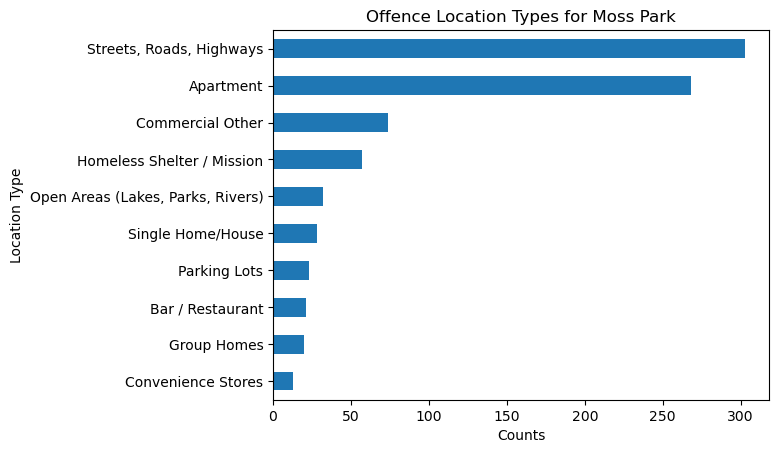

In [141]:
#Create a bar chart for the location types in MP
mp_location_final['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
plt.title('Offence Location Types for Moss Park')
plt.ylabel('Location Type')
plt.xlabel('Counts')
plt.show()

In [142]:
#Group mp_hood by premises type and get the count of each premise
mp_premises = mp_hood.groupby('PREMISES_TYPE').count()
mp_premises

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
PREMISES_TYPE,,,,,,,,,,
Apartment,268,268,268,268,268,268,268,268,268,268
Commercial,128,128,128,128,128,128,128,128,128,128
Educational,5,5,5,5,5,5,5,5,5,5
House,28,28,28,28,28,28,28,28,28,28
Other,112,112,112,112,112,112,112,112,112,112
Outside,359,359,359,359,359,359,359,359,359,359
Transit,12,12,12,12,12,12,12,12,12,12


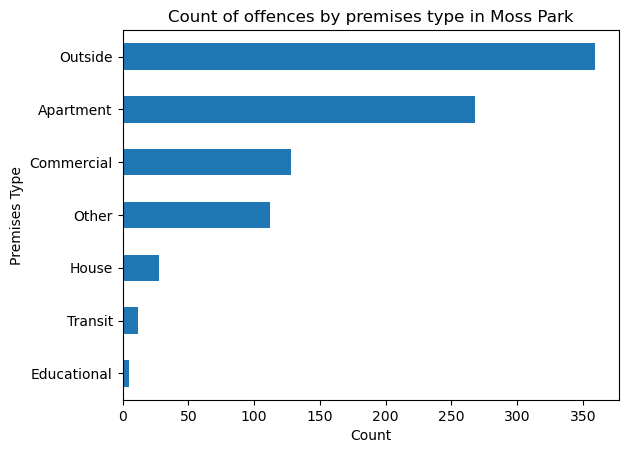

In [144]:
#Create bar chart for premises type in MP
mp_premises['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
plt.title('Count of offences by premises type in Moss Park')
plt.ylabel('Premises Type')
plt.xlabel('Count')
plt.show()

In [145]:
#Copy the mp_hood dataframe to order months in chronological order (making a copy so the original df is intact)
mp_occ_month = mp_hood.copy()

In [146]:
#Order months in the series in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mp_occ_month['OCC_MONTH'] = pd.Categorical(mp_occ_month['OCC_MONTH'], categories = months, ordered = True)

In [147]:
#Sort this new dataframe by month
mp_occ_month = mp_occ_month.sort_values(by = 'OCC_MONTH')

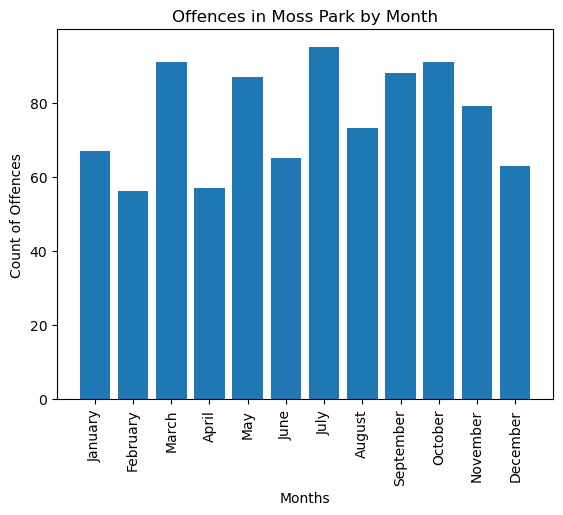

In [148]:
#Create bar chart of offences in MP by month
#Set x and y values
mp_occ_x = months
mp_occ_y = mp_occ_month.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
#Set x tick labels and locations
xticks_labels = months
xtick_locations = [value for value in mp_occ_x]
#Generate the plot and set the x ticks, title and axis labels
plt.bar(mp_occ_x, mp_occ_y)
plt.xticks(xtick_locations, xticks_labels, rotation = 90)
plt.title('Offences in Moss Park by Month')
plt.ylabel('Count of Offences')
plt.xlabel('Months')
plt.show()

### Assault offences in Moss Park
Further analyze assault offences in Moss Park as they make up such a significant portion of offences in that neighbourhood.

What is the most common location type for assault offences?

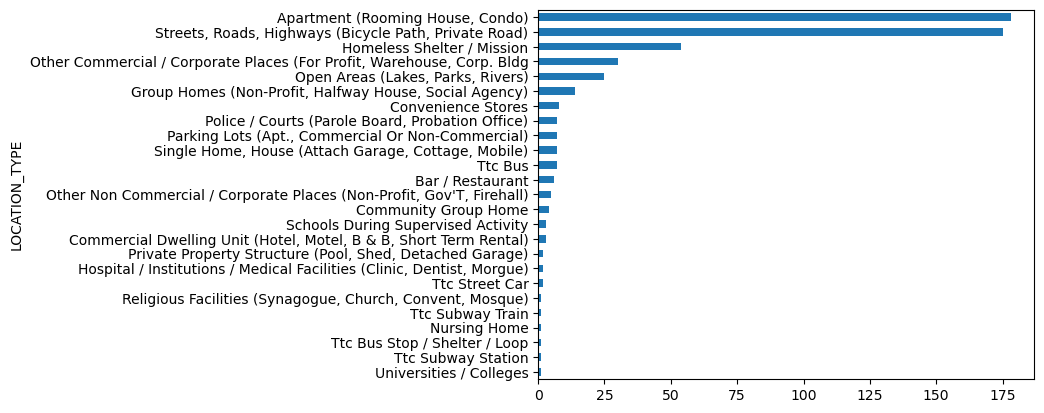

In [151]:
#Separate mp_hood dataframe to only keep rows where the MCI category is auto theft
mp_hood_assault = mp_hood.loc[mp_hood['MCI_CATEGORY'] == 'Assault']
#Group this new dataframe by location type and plot a horizontal bar chart
mp_hood_assault_loc = mp_hood_assault.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
mp_hood_assault_loc.sort_values().plot(kind = 'barh')
plt.show()

When do assault offences occur most often throughout the year?

In [154]:
#Order months in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mp_hood_assault['OCC_MONTH'] = pd.Categorical(mp_hood_assault['OCC_MONTH'], categories = months, ordered = True)

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_49649/298864128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_hood_assault['OCC_MONTH'] = pd.Categorical(mp_hood_assault['OCC_MONTH'], categories = months, ordered = True)


,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
125,GO-201810218,2018-01-02,2018-01-02,January,2018,Homeless Shelter / Mission,Other,Assault Peace Officer,Assault,73,Moss Park
176,GO-201816901,2018-01-03,2018-01-03,January,2018,"Private Property Structure (Pool, Shed, Detach...",Other,Assault Bodily Harm,Assault,73,Moss Park
299,GO-201825533,2018-01-05,2018-01-05,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault Bodily Harm,Assault,73,Moss Park
321,GO-201824621,2018-01-05,2018-01-05,January,2018,Bar / Restaurant,Commercial,Assault,Assault,73,Moss Park
388,GO-201835387,2018-01-06,2018-01-06,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,73,Moss Park
...,...,...,...,...,...,...,...,...,...,...,...
34362,GO-20191105130,2019-06-15,2018-07-10,July,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park
34363,GO-20191105130,2019-06-15,2018-07-10,July,2018,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,73,Moss Park
34668,GO-2021634868,2021-04-07,2018-12-29,December,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park
34700,GO-20211627033,2021-08-26,2018-10-01,October,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,73,Moss Park


In [155]:
#Sort by month
mp_hood_assault = mp_hood_assault.sort_values(by = 'OCC_MONTH')

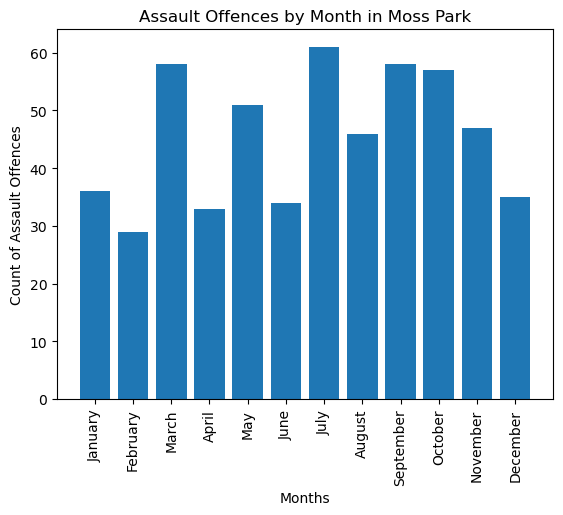

In [156]:
#Create bar chart of assault offences by month in Moss Park
#Set x and y values
mp_assault_x = months
mp_assault_y = mp_hood_assault.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
#Set x tick labels and locations
xticks_labels = months
xtick_locations = [value for value in mp_assault_x]
#Generate the plot and set the x ticks, title and axis labels
plt.bar(mp_assault_x, mp_assault_y)
plt.xticks(xtick_locations, xticks_labels, rotation = 90)
plt.title('Assault Offences by Month in Moss Park')
plt.ylabel('Count of Assault Offences')
plt.xlabel('Months')
plt.show()

What does the count of offences per month look like in Moss Park if we remove assaults?

In [159]:
#Create a new dataframe from mp_hood that doesn't include assault offences
mp_no_assault = mp_hood.loc[mp_hood['MCI_CATEGORY'] != 'Assault']
#Order months in the series in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mp_no_assault['OCC_MONTH'] = pd.Categorical(mp_no_assault['OCC_MONTH'], categories = months, ordered = True)

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_49649/2700789699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_no_assault['OCC_MONTH'] = pd.Categorical(mp_no_assault['OCC_MONTH'], categories = months, ordered = True)


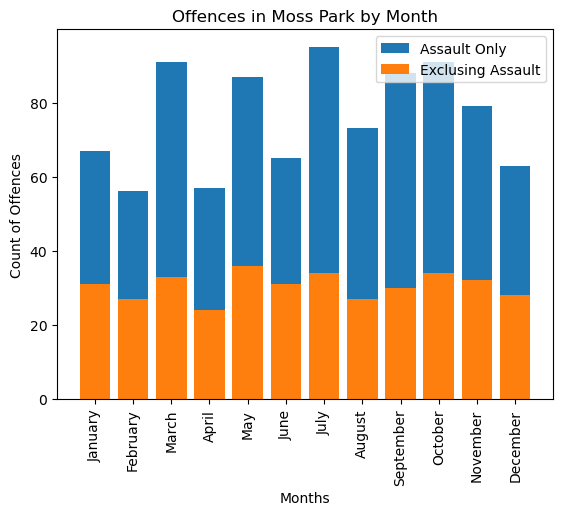

In [173]:
#Create a bar chart from this new dataframe
#Set x and y values
mp_no_assault_x = months
mp_no_assault_y = mp_no_assault.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
#Set x tick labels and locations
xticks_labels = months
xtick_locations = [value for value in mp_no_assault_x]
#Generate two bar charts on the same plot, the first for all offences in Moss Park
# and the second for only assault offences 
plt.bar(mp_occ_x, mp_occ_y)
plt.bar(mp_no_assault_x, mp_no_assault_y)
#Set the x ticks, legend, title and axis labels
plt.xticks(xtick_locations, xticks_labels, rotation = 90)
plt.title('Offences in Moss Park by Month')
plt.ylabel('Count of Offences')
plt.xlabel('Months')
labels = ['Assault Only', 'Exclusing Assault']
plt.legend(labels = labels)
#Show the figure
plt.show()

In [181]:
#Get percentage of all offences that are assault
mp_assault_sum = mp_hood_assault['EVENT_UNIQUE_ID'].count()
mp_sum = mp_hood['EVENT_UNIQUE_ID'].count()
assault_pct = (mp_assault_sum / mp_sum) * 100
print(f"Assault offences accounted for {round(assault_pct, 2)}% of all offences in Moss Park in 2018.")

Assault offences accounted for 59.76% of all offences in Moss Park in 2018.


### Neighbourhood 3: Downtown Yonge East

In [182]:
#Inspect DYE dataframe
dye_hood

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20181532,2018-01-01,2018-01-01,January,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
184,GO-20189000231,2018-01-03,2018-01-03,January,2018,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,168,Downtown Yonge East
227,GO-201813969,2018-01-03,2018-01-03,January,2018,Other Non Commercial / Corporate Places (Non-P...,Other,Assault With Weapon,Assault,168,Downtown Yonge East
290,GO-201826810,2018-01-05,2018-01-01,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault Bodily Harm,Assault,168,Downtown Yonge East
298,GO-201829409,2018-01-05,2018-01-05,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,168,Downtown Yonge East
...,...,...,...,...,...,...,...,...,...,...,...
34332,GO-20191017052,2019-06-03,2018-12-01,December,2018,"Apartment (Rooming House, Condo)",Apartment,B&E W'Intent,Break and Enter,168,Downtown Yonge East
34415,GO-20191465305,2019-08-03,2018-06-01,June,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
34457,GO-20191740031,2019-09-11,2018-07-30,July,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,168,Downtown Yonge East
34458,GO-20191740034,2019-09-11,2018-07-30,July,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,168,Downtown Yonge East


In [183]:
#Group by MCI category and get the count of offences
dye_mci_category = dye_hood.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
dye_mci_category

MCI_CATEGORY
Assault            454
Auto Theft          45
Break and Enter    123
Robbery            135
Theft Over          21
Name: EVENT_UNIQUE_ID, dtype: int64

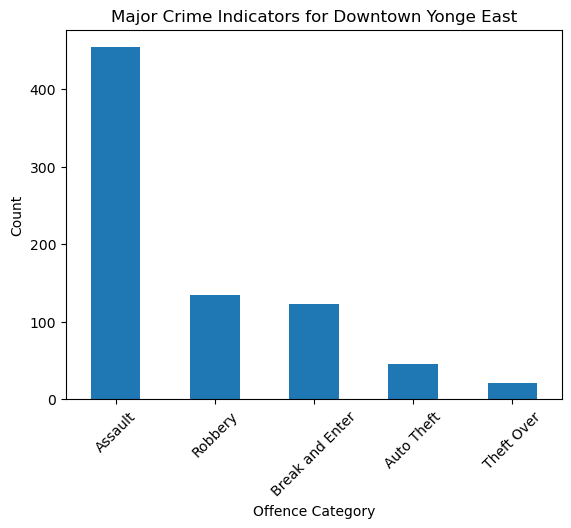

In [184]:
#Create a bar chart of MCI_CATEGORY for Downtown Yonge East
dye_mci_category.sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Offence Category')
plt.title('Major Crime Indicators for Downtown Yonge East')
plt.show()

In [189]:
#Group whc_hood by location type and get the count of each location
dye_location = dye_hood.groupby('LOCATION_TYPE').count()
dye_location

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",81,81,81,81,81,81,81,81,81,81
"Bank And Other Financial Institutions (Money Mart, Tsx)",6,6,6,6,6,6,6,6,6,6
Bar / Restaurant,40,40,40,40,40,40,40,40,40,40
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",23,23,23,23,23,23,23,23,23,23
Community Group Home,1,1,1,1,1,1,1,1,1,1
"Construction Site (Warehouse, Trailer, Shed)",6,6,6,6,6,6,6,6,6,6
Convenience Stores,27,27,27,27,27,27,27,27,27,27
"Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",2,2,2,2,2,2,2,2,2,2
"Gas Station (Self, Full, Attached Convenience)",4,4,4,4,4,4,4,4,4,4


In [186]:
#Check how many location types have only 1 offence
dye_location_one_occ = dye_location.loc[dye_location['EVENT_UNIQUE_ID'] == 1]
len(dye_location_one_occ)

2

In [187]:
#Check how many location types have less than 10 offences
dye_location_ten_occ = dye_location.loc[dye_location['EVENT_UNIQUE_ID'] <= 10]
len(dye_location_ten_occ)

16

In [190]:
#Drop the location types that have less than 10 offences for the whole year
dye_location_occ = dye_location.loc[dye_location['EVENT_UNIQUE_ID'] >= 10]
dye_location_occ

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
"Apartment (Rooming House, Condo)",81,81,81,81,81,81,81,81,81,81
Bar / Restaurant,40,40,40,40,40,40,40,40,40,40
"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",23,23,23,23,23,23,23,23,23,23
Convenience Stores,27,27,27,27,27,27,27,27,27,27
Homeless Shelter / Mission,16,16,16,16,16,16,16,16,16,16
"Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)",35,35,35,35,35,35,35,35,35,35
"Open Areas (Lakes, Parks, Rivers)",26,26,26,26,26,26,26,26,26,26
"Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg",110,110,110,110,110,110,110,110,110,110
"Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)",12,12,12,12,12,12,12,12,12,12


In [191]:
#List of index labels
dye_location_occ.index

Index(['Apartment (Rooming House, Condo)', 'Bar / Restaurant',
       'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)',
       'Convenience Stores', 'Homeless Shelter / Mission',
       'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)',
       'Open Areas (Lakes, Parks, Rivers)',
       'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg',
       'Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)',
       'Parking Lots (Apt., Commercial Or Non-Commercial)',
       'Streets, Roads, Highways (Bicycle Path, Private Road)',
       'Ttc Subway Station', 'Universities / Colleges'],
      dtype='object', name='LOCATION_TYPE')

In [194]:
#Rename index labels to be shorter/more readable
dye_location_final = dye_location_occ.rename(index = {"Apartment (Rooming House, Condo)": "Apartment",
                                                      "Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)":
                                                      "Commercial Dwelling Unit", "Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)":
                                                      "Medical Facilities", "Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg": "Commercial Other",
                                                      "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)": "Non Commercial Other",
                                                      "Parking Lots (Apt., Commercial Or Non-Commercial)": "Parking Lots",
                                                      "Streets, Roads, Highways (Bicycle Path, Private Road)": "Streets, Roads, Highways"})
dye_location_final

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
LOCATION_TYPE,,,,,,,,,,
Apartment,81,81,81,81,81,81,81,81,81,81
Bar / Restaurant,40,40,40,40,40,40,40,40,40,40
Commercial Dwelling Unit,23,23,23,23,23,23,23,23,23,23
Convenience Stores,27,27,27,27,27,27,27,27,27,27
Homeless Shelter / Mission,16,16,16,16,16,16,16,16,16,16
Medical Facilities,35,35,35,35,35,35,35,35,35,35
"Open Areas (Lakes, Parks, Rivers)",26,26,26,26,26,26,26,26,26,26
Commercial Other,110,110,110,110,110,110,110,110,110,110
Non Commercial Other,12,12,12,12,12,12,12,12,12,12


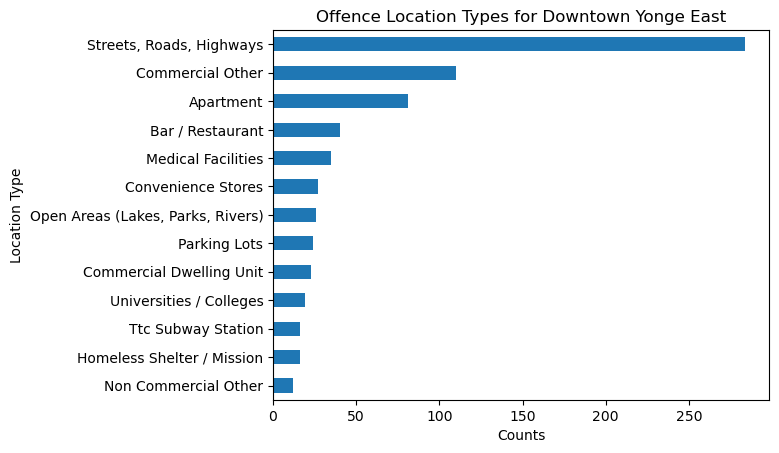

In [195]:
#Create a bar chart for the location types in DYE
dye_location_final['EVENT_UNIQUE_ID'].sort_values().plot(kind = 'barh')
plt.title('Offence Location Types for Downtown Yonge East')
plt.ylabel('Location Type')
plt.xlabel('Counts')
plt.show()

In [196]:
#Group dye_hood by premises type and get the count of each premise
dye_premises = dye_hood.groupby('PREMISES_TYPE').count()
dye_premises

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
PREMISES_TYPE,,,,,,,,,,
Apartment,81,81,81,81,81,81,81,81,81,81
Commercial,218,218,218,218,218,218,218,218,218,218
Educational,31,31,31,31,31,31,31,31,31,31
House,4,4,4,4,4,4,4,4,4,4
Other,78,78,78,78,78,78,78,78,78,78
Outside,334,334,334,334,334,334,334,334,334,334
Transit,32,32,32,32,32,32,32,32,32,32


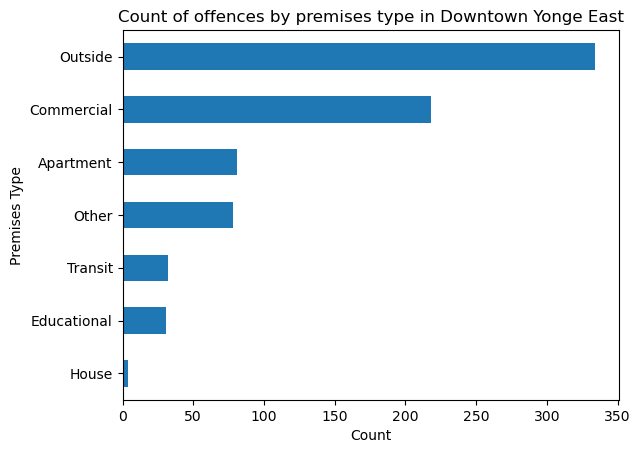

In [197]:
#Create bar chart for premises type in DYE
dye_premises['EVENT_UNIQUE_ID'].sort_values(ascending = True).plot(kind = 'barh')
plt.title('Count of offences by premises type in Downtown Yonge East')
plt.ylabel('Premises Type')
plt.xlabel('Count')
plt.show()

In [198]:
#Copy the dye_hood dataframe to order months in chronological order (making a copy so the original df is intact)
dye_occ_month = dye_hood.copy()

In [199]:
#Order months in the series in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dye_occ_month['OCC_MONTH'] = pd.Categorical(dye_occ_month['OCC_MONTH'], categories = months, ordered = True)

In [200]:
#Sort this new dataframe by month
dye_occ_month = dye_occ_month.sort_values(by = 'OCC_MONTH')

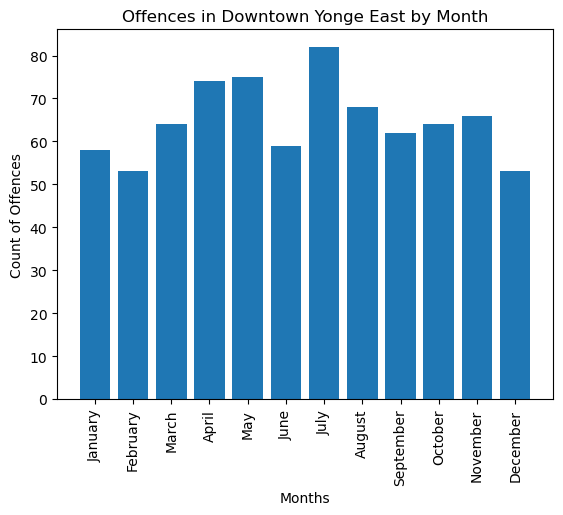

In [201]:
#Create bar chart of offences in DYE by month
#Set x and y values
dye_occ_x = months
dye_occ_y = dye_occ_month.groupby('OCC_MONTH')['MCI_CATEGORY'].count()
#Set x tick labels and locations
xticks_labels = months
xtick_locations = [value for value in dye_occ_x]
#Generate the plot and set the x ticks, title and axis labels
plt.bar(dye_occ_x, dye_occ_y)
plt.xticks(xtick_locations, xticks_labels, rotation = 90)
plt.title('Offences in Downtown Yonge East by Month')
plt.ylabel('Count of Offences')
plt.xlabel('Months')
plt.show()

What is the most common location type for assault offences (as the greatest offence category in Downtown Yonge East)?

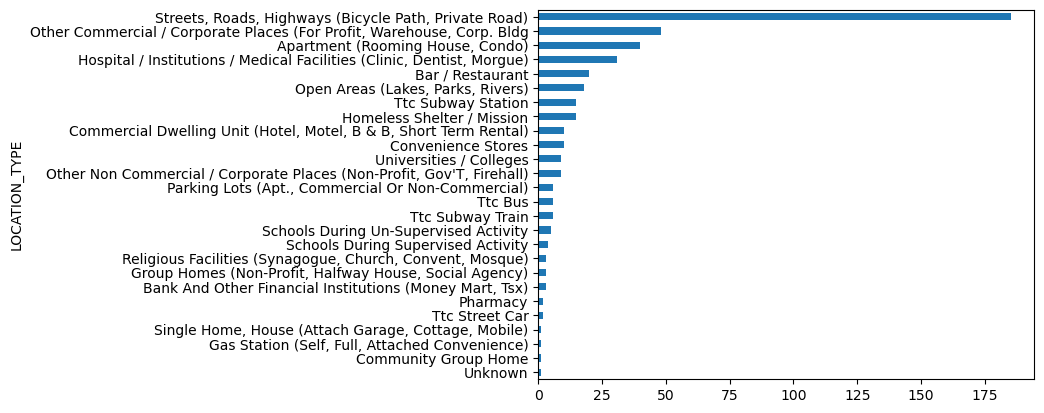

In [208]:
#Separate dye_hood dataframe to only keep rows where the MCI category is assault
dye_assault = dye_hood.loc[dye_hood['MCI_CATEGORY'] == 'Assault']
#Group this new dataframe by location type and plot a horizontal bar chart
dye_assault_loc = dye_assault.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
dye_assault_loc.sort_values().plot(kind = 'barh')
plt.show()